In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from collections import namedtuple

# Завдання 7


In [3]:
Task7Params = namedtuple('Task7Params', 'rho')
Task7Result = namedtuple('Task7Result', 'nsteps, xhist, yhist')
def Task7(params: Task7Params, stat_offset=2000, n_steps=2000, seed=42, debug=False):
    rng = np.random.default_rng(seed)
    rho,rho2 = params.rho, params.rho*params.rho

    X = 0
    Y = 0
    x_history = []
    y_history = []
    
    for step in range(stat_offset+n_steps):
        X = sp.stats.norm.rvs(rho * Y, 1-rho2, random_state=rng)
        Y = sp.stats.norm.rvs(rho * X, 1-rho2, random_state=rng)
        x_history.append(X)
        y_history.append(Y)

    return Task7Result(n_steps, x_history, y_history)


In [4]:
params = Task7Params(rho=0.2)
res = Task7(params, stat_offset=0, n_steps=10000, seed=42)

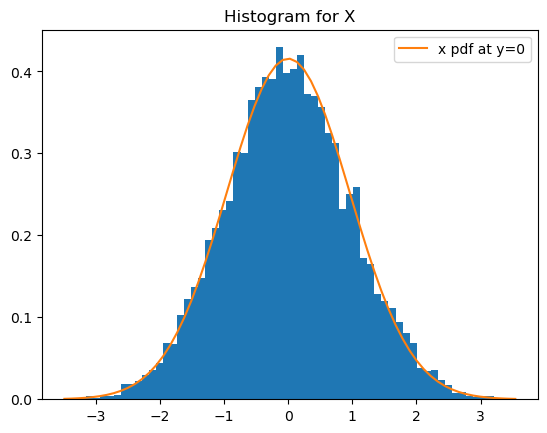

In [16]:
xhist = np.array(res.xhist)
yhist = np.array(res.yhist)
r = params.rho

xplot = plt.hist(xhist, 64, density=True)
plt.title("Histogram for X")
plt.plot(xplot[1], sp.stats.norm(0,1-r*r).pdf(xplot[1]), label='x pdf at y=0')
plt.legend()

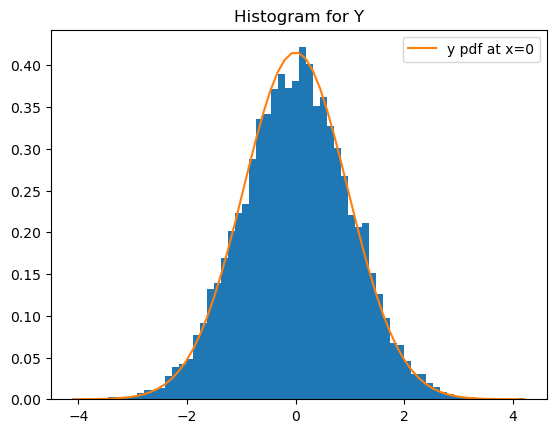

In [17]:
yplot = plt.hist(yhist, 64, density=True)
plt.title("Histogram for Y")
plt.plot(yplot[1], sp.stats.norm(0,1-r*r).pdf(yplot[1]), label='y pdf at x=0')
plt.legend()

In [18]:
from mpl_toolkits.mplot3d import axes3d

(16, 16) (16, 16)
(16, 16)


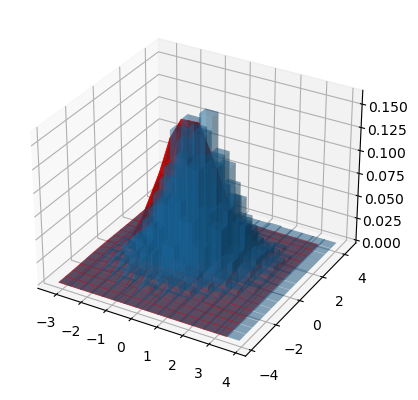

In [72]:
joint_histogram, xedges, yedges = \
    np.histogram2d(xhist, yhist, [16,16], density=True)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
zpos = 0

print(xpos.shape, ypos.shape)

z = sp.stats.multivariate_normal(cov=np.array([[1, r],[r, 1]])).pdf(np.dstack([xpos,ypos]))
print(z.shape)

ax.bar3d(xpos.ravel(), ypos.ravel(), zpos, 0.5, 0.5, joint_histogram.ravel(), alpha=0.3, label='hist')
ax.plot_surface(xpos, ypos, z, alpha=0.7, color='r',edgecolor='red', lw=0.5, rstride=1, cstride=1, label='true')